DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Removing Duplicate if any

In [6]:
df.shape

(918, 12)

In [7]:
df = df.drop_duplicates()
df.shape

(918, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Encoding

In [9]:
print(df['Sex'].value_counts(),
df['ChestPainType'].value_counts(),
df['RestingECG'].value_counts(),
df['ExerciseAngina'].value_counts(),
df['ST_Slope'].value_counts(),end= "\n",sep="\n")

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [10]:
print(df["Sex"].value_counts(),
df["ExerciseAngina"].value_counts(),end= "\n",sep="\n")

Sex
M    725
F    193
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
# Label Encoding for binary values
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])


In [13]:
print(df['Sex'].value_counts(),
df['ChestPainType'].value_counts(),
df['RestingECG'].value_counts(),
df['ExerciseAngina'].value_counts(),
df['ST_Slope'].value_counts(),end= "\n",sep="\n")

Sex
1    725
0    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
0    547
1    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [14]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


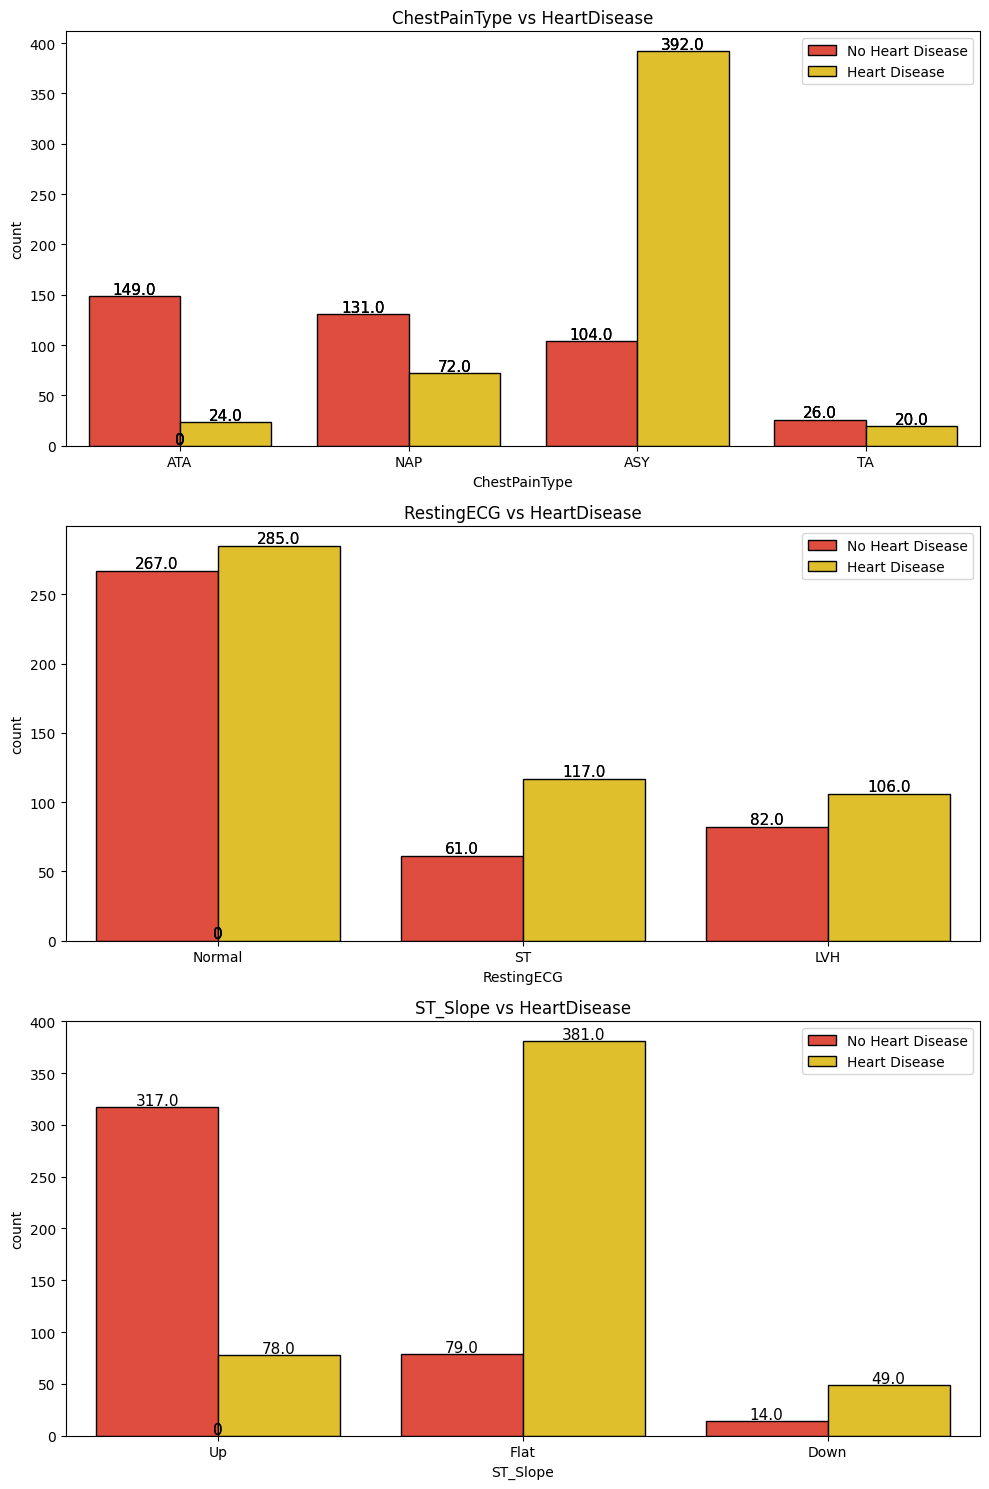

In [15]:
colors = ['#F93822', '#FDD20E']
categorical_features = ['ChestPainType', 'RestingECG', 'ST_Slope']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))  # Changed ncols to 1 for 3 rows and 1 column

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, hue="HeartDisease", palette=colors, edgecolor='black', ax=axes[i])
    for ax in axes:
        for rect in ax.patches:
            ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    axes[i].set_title(f"{feature} vs HeartDisease")
    axes[i].legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

In [16]:
#for the rest the dataset is divided into 2 . 
# df1 for label encoding 
# df2 for one-hot encoding 
# df3 for ordinal encoding
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [17]:
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [18]:
print(df['Sex'].value_counts(),
df['ChestPainType'].value_counts(),
df['RestingECG'].value_counts(),
df['ExerciseAngina'].value_counts(),
df['ST_Slope'].value_counts(),end= "\n",sep="\n")

Sex
1    725
0    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
0    547
1    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [19]:
print(df1['Sex'].value_counts(),
df1['ChestPainType'].value_counts(),
df1['RestingECG'].value_counts(),
df1['ExerciseAngina'].value_counts(),
df1['ST_Slope'].value_counts(),end= "\n",sep="\n")

Sex
1    725
0    193
Name: count, dtype: int64
ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64
RestingECG
1    552
0    188
2    178
Name: count, dtype: int64
ExerciseAngina
0    547
1    371
Name: count, dtype: int64
ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [21]:
df2 = pd.get_dummies(data = df2).astype(int)


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                918 non-null    int32
 1   Sex                918 non-null    int32
 2   RestingBP          918 non-null    int32
 3   Cholesterol        918 non-null    int32
 4   FastingBS          918 non-null    int32
 5   MaxHR              918 non-null    int32
 6   ExerciseAngina     918 non-null    int32
 7   Oldpeak            918 non-null    int32
 8   HeartDisease       918 non-null    int32
 9   ChestPainType_ASY  918 non-null    int32
 10  ChestPainType_ATA  918 non-null    int32
 11  ChestPainType_NAP  918 non-null    int32
 12  ChestPainType_TA   918 non-null    int32
 13  RestingECG_LVH     918 non-null    int32
 14  RestingECG_Normal  918 non-null    int32
 15  RestingECG_ST      918 non-null    int32
 16  ST_Slope_Down      918 non-null    int32
 17  ST_Slope_Flat   

In [23]:
chestPain = ['ASY', 'NAP', 'ATA', 'TA']
ecg = ['Normal', 'ST', 'LVH']
stslope = ['Flat', 'Up', 'Down']

encoder_chest_pain = OrdinalEncoder(categories=[(chestPain[::-1])])
encoder_ecg = OrdinalEncoder(categories=[(ecg[::-1])])
encoder_st_slope = OrdinalEncoder(categories=[(stslope[::-1])])

df3['ChestPainType'] = encoder_chest_pain.fit_transform(df3[['ChestPainType']])
df3['RestingECG'] = encoder_ecg.fit_transform(df3[['RestingECG']])
df3['ST_Slope'] = encoder_st_slope.fit_transform(df3[['ST_Slope']])

In [24]:
print(df3['Sex'].value_counts(),
df3['ChestPainType'].value_counts(),
df3['RestingECG'].value_counts(),
df3['ExerciseAngina'].value_counts(),
df3['ST_Slope'].value_counts(),end= "\n",sep="\n")

Sex
1    725
0    193
Name: count, dtype: int64
ChestPainType
3.0    496
2.0    203
1.0    173
0.0     46
Name: count, dtype: int64
RestingECG
2.0    552
0.0    188
1.0    178
Name: count, dtype: int64
ExerciseAngina
0    547
1    371
Name: count, dtype: int64
ST_Slope
2.0    460
1.0    395
0.0     63
Name: count, dtype: int64


In [25]:
df3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1.0,140,289,0,2.0,172,0,0.0,1.0,0
1,49,0,2.0,160,180,0,2.0,156,0,1.0,2.0,1
2,37,1,1.0,130,283,0,1.0,98,0,0.0,1.0,0
3,48,0,3.0,138,214,0,2.0,108,1,1.5,2.0,1
4,54,1,2.0,150,195,0,2.0,122,0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0.0,110,264,0,2.0,132,0,1.2,2.0,1
914,68,1,3.0,144,193,1,2.0,141,0,3.4,2.0,1
915,57,1,3.0,130,131,0,2.0,115,1,1.2,2.0,1
916,57,0,1.0,130,236,0,0.0,174,0,0.0,2.0,1


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    float64
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    float64
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int32(2), int64(6)
memory usage: 79.0 KB


EDA

In [27]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [28]:
df2.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [29]:
df3.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

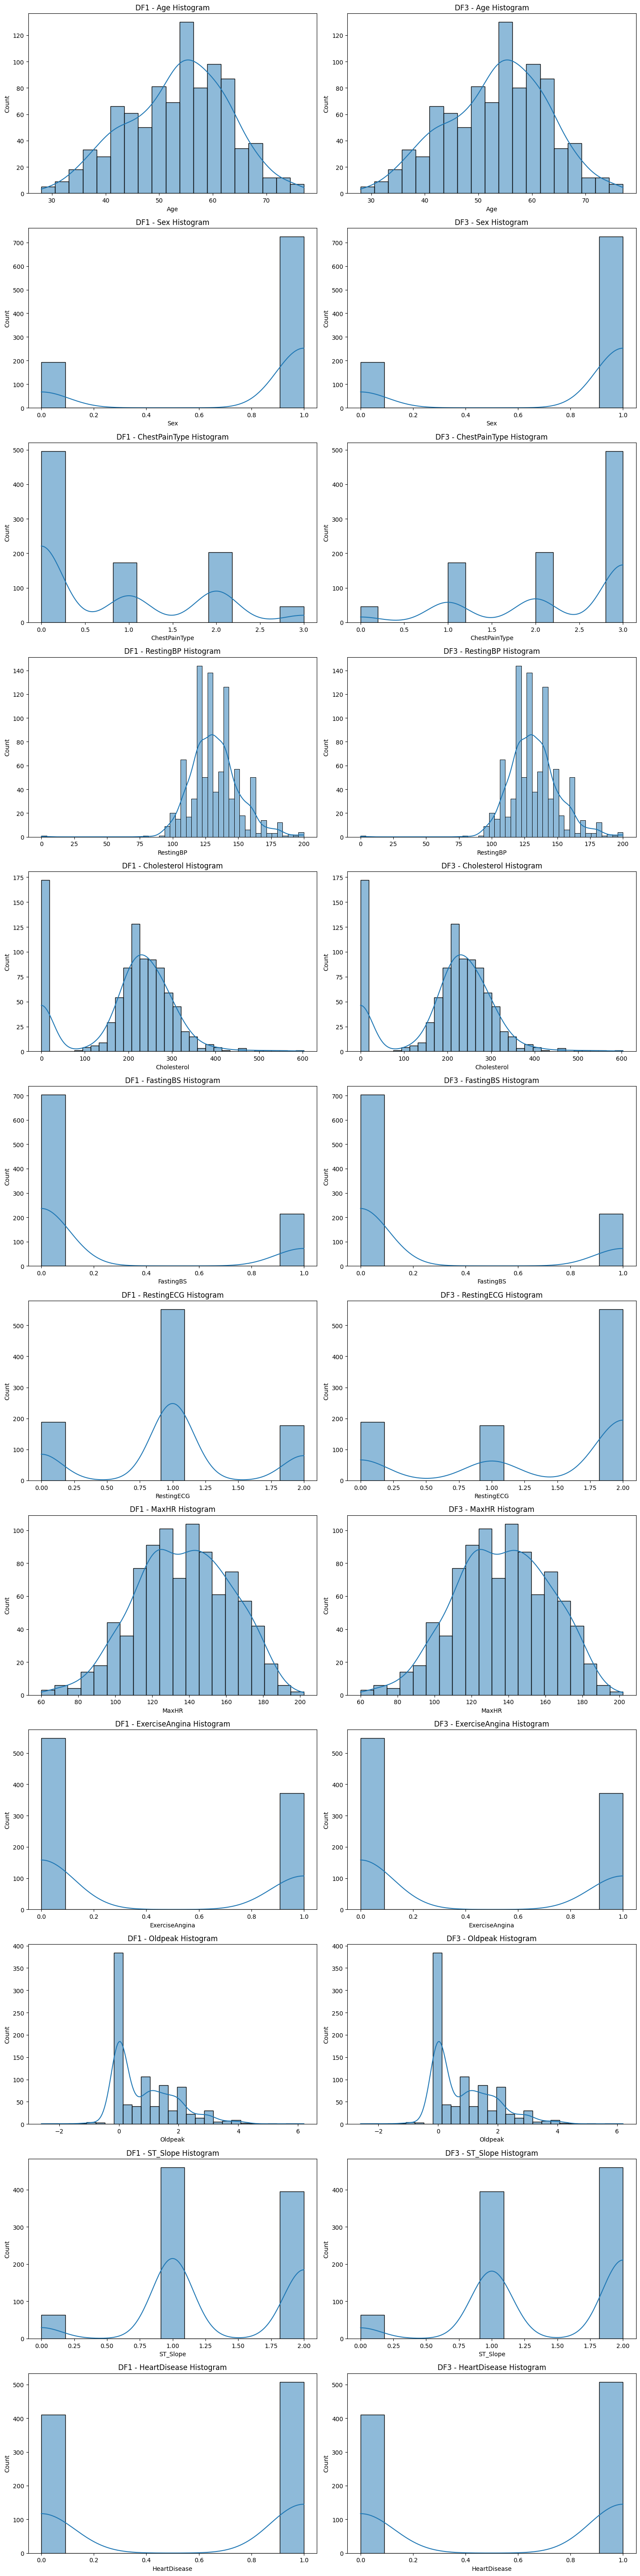

In [30]:
# Columns to plot
columns_to_plot = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']

# Setting up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(15, 5*len(columns_to_plot)))
fig.subplots_adjust(hspace=0.5)

# Plotting histograms for each column
for idx, col in enumerate(columns_to_plot):
    # Plot for df1
    sns.histplot(data=df1, x=col, ax=axes[idx, 0], kde=True)
    axes[idx, 0].set_title(f'DF1 - {col} Histogram')

    # Plot for df3
    sns.histplot(data=df3, x=col, ax=axes[idx, 1], kde=True)
    axes[idx, 1].set_title(f'DF3 - {col} Histogram')

plt.tight_layout()
plt.show()


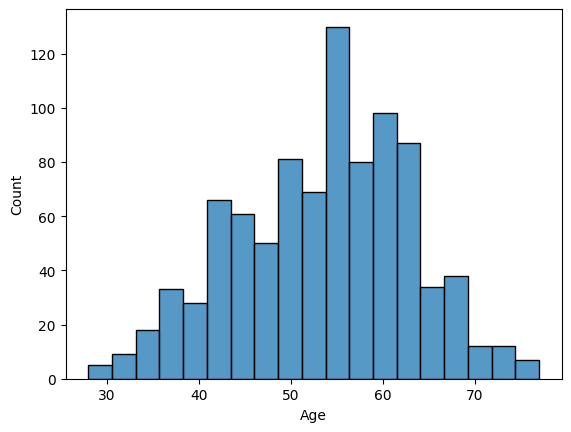

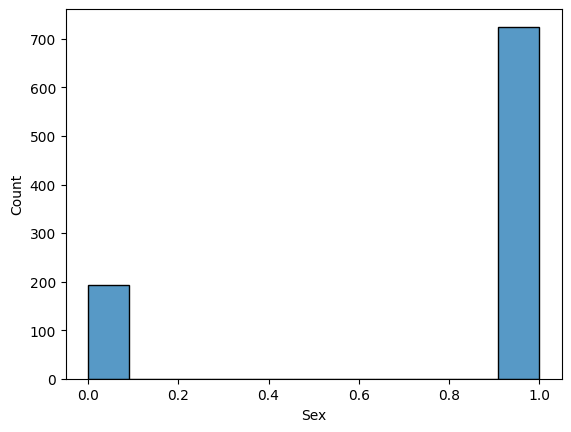

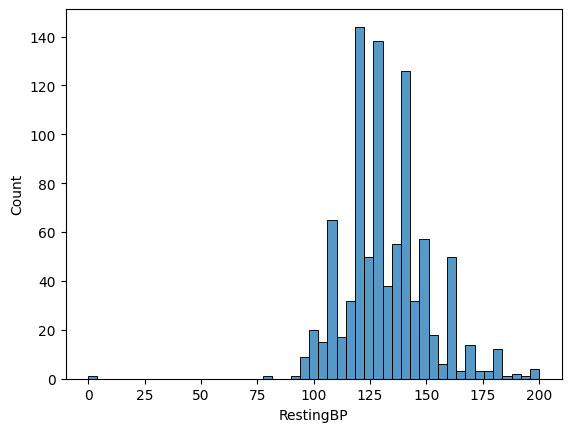

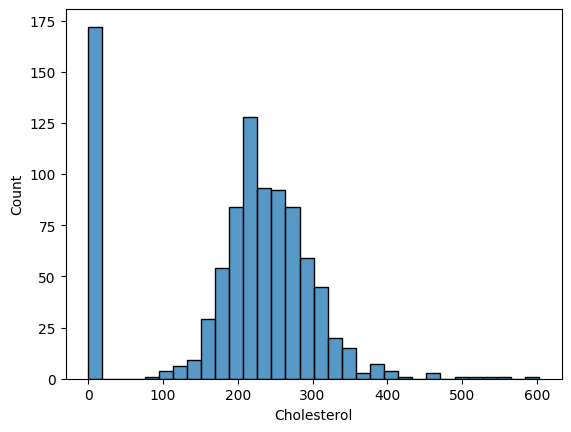

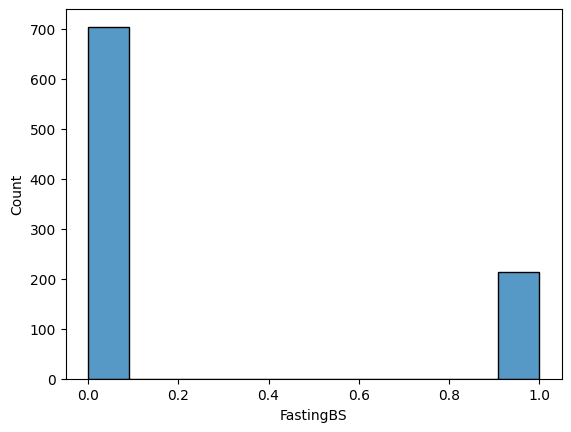

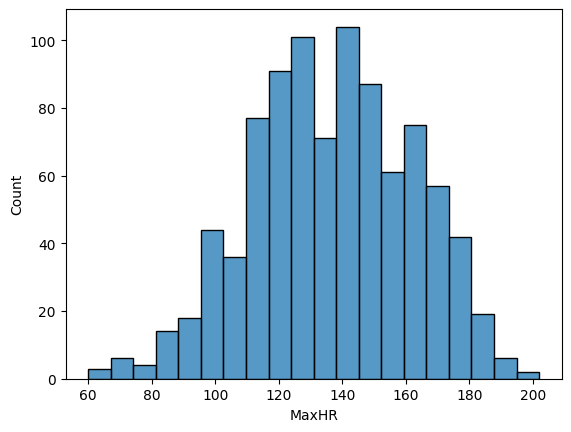

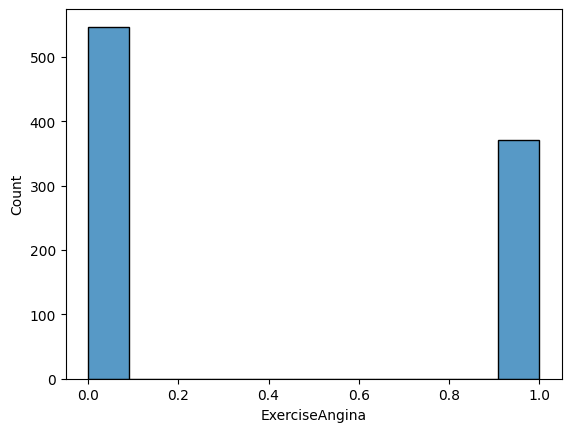

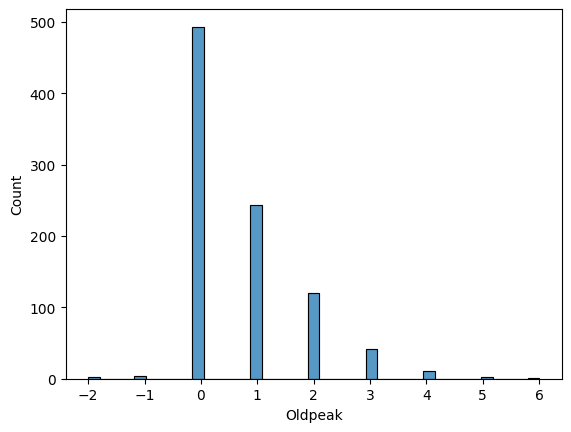

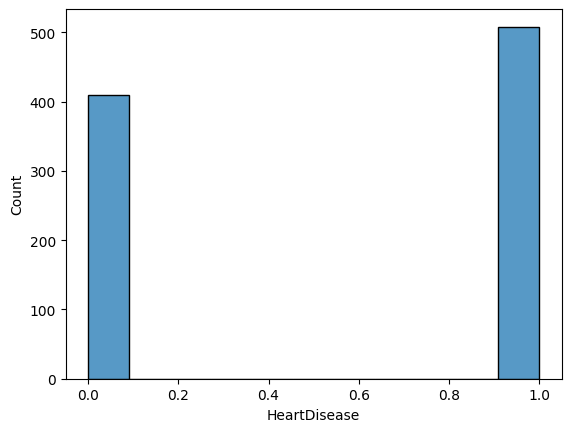

In [31]:
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data = df2,x = i)
    plt.show()

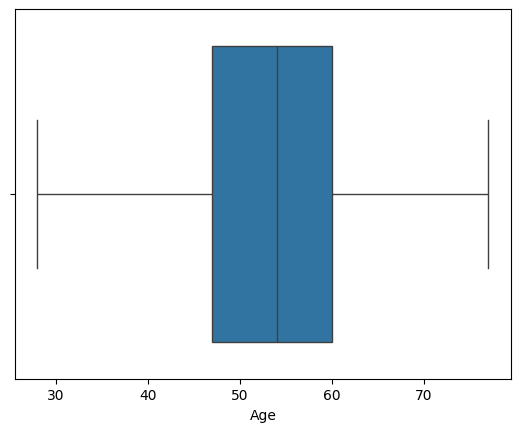

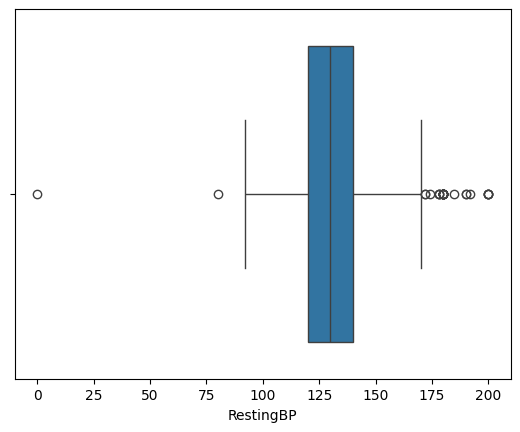

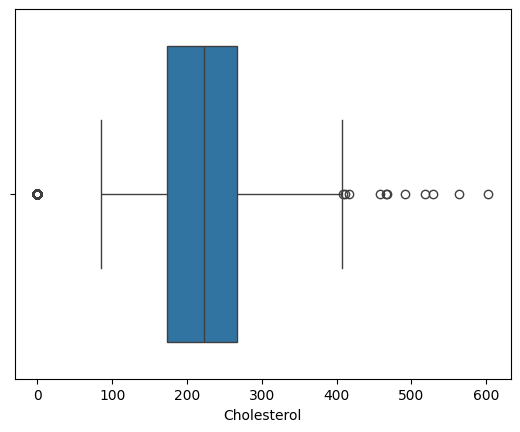

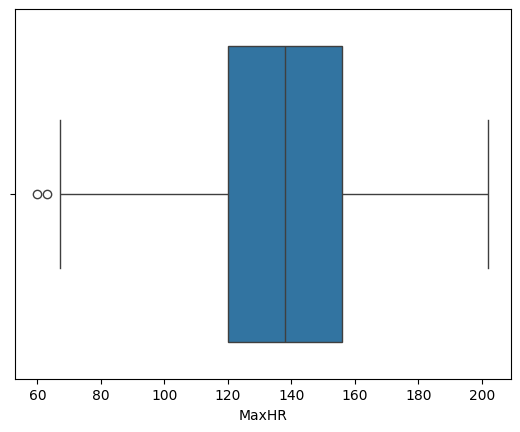

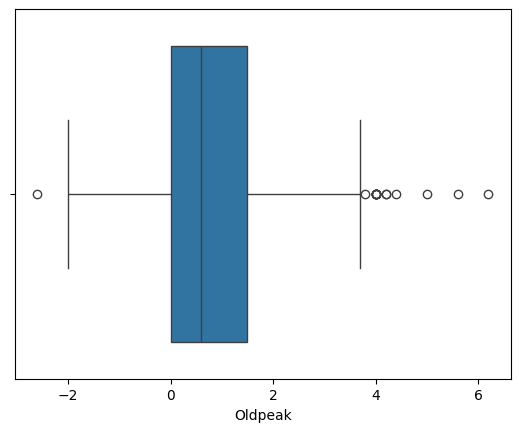

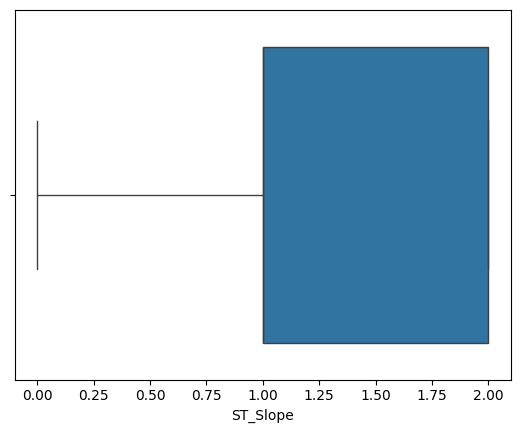

In [32]:
for i in ['Age', 'RestingBP', 'Cholesterol',
        'MaxHR', 'Oldpeak', 'ST_Slope']:
    sns.boxplot(data = df1,x = df1[i])
    plt.show()

In [33]:
df3.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [34]:
df3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1.0,140,289,0,2.0,172,0,0.0,1.0,0
1,49,0,2.0,160,180,0,2.0,156,0,1.0,2.0,1
2,37,1,1.0,130,283,0,1.0,98,0,0.0,1.0,0
3,48,0,3.0,138,214,0,2.0,108,1,1.5,2.0,1
4,54,1,2.0,150,195,0,2.0,122,0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0.0,110,264,0,2.0,132,0,1.2,2.0,1
914,68,1,3.0,144,193,1,2.0,141,0,3.4,2.0,1
915,57,1,3.0,130,131,0,2.0,115,1,1.2,2.0,1
916,57,0,1.0,130,236,0,0.0,174,0,0.0,2.0,1


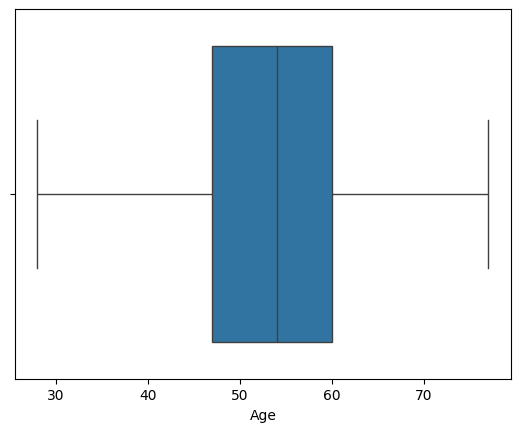

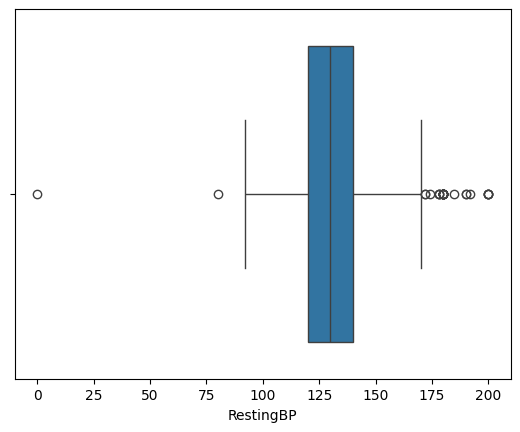

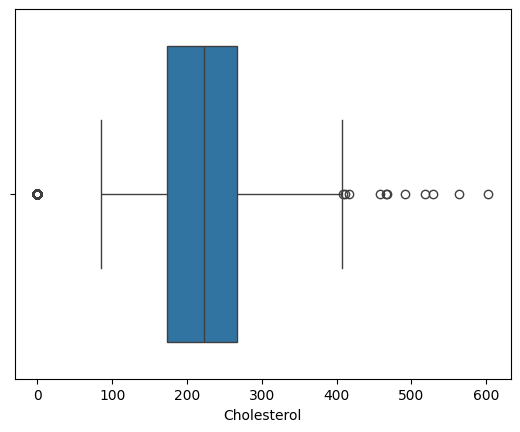

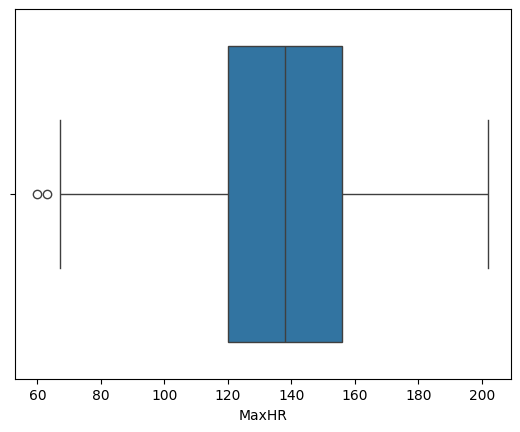

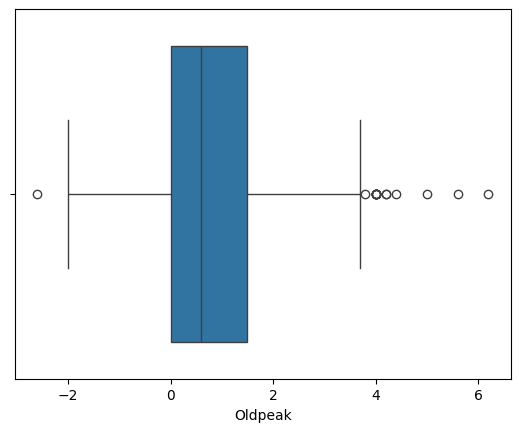

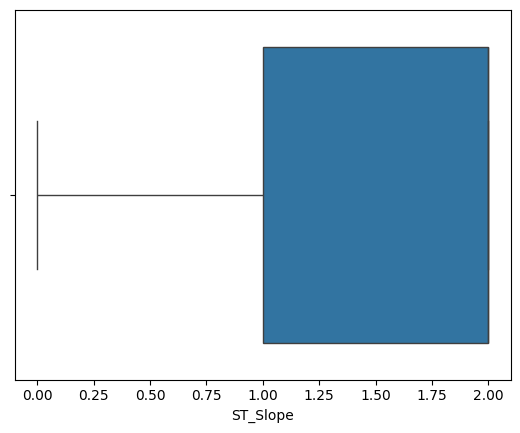

In [35]:
for i in ['Age', 'RestingBP', 'Cholesterol',
        'MaxHR', 'Oldpeak', 'ST_Slope']:
    sns.boxplot(data = df3,x = df3[i])
    plt.show()

Removing Outliers

In [36]:
# Replacing with whiskers
#df1_1 for df1
#df2_1 for df2
#df3_1 for df3
df1_1 = df1.copy()
df2_1 = df2.copy()
df3_1 = df3.copy()

In [37]:

Q1 = df1_1.quantile(0.25)
Q3 = df1_1.quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR


for i in ['Age', 'RestingBP', 'Cholesterol',
        'MaxHR', 'Oldpeak', 'ST_Slope']:
    df1_1.loc[df1_1[i] < lower_whisker[i], i] = lower_whisker[i]
    df1_1.loc[df1_1[i] > upper_whisker[i], i] = upper_whisker[i]



C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\793804136.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1_1.loc[df1_1[i] < lower_whisker[i], i] = lower_whisker[i]
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\793804136.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1_1.loc[df1_1[i] < lower_whisker[i], i] = lower_whisker[i]
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\793804136.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df1

In [38]:
df2.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [39]:
Q1 = df2_1.quantile(0.25)
Q3 = df2_1.quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR


for i in ['Age', 'RestingBP', 'Cholesterol',
        'MaxHR', 'Oldpeak']:
    df2_1.loc[df2_1[i] < lower_whisker[i], i] = lower_whisker[i]
    df2_1.loc[df2_1[i] > upper_whisker[i], i] = upper_whisker[i]

C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\702600973.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df2_1.loc[df2_1[i] < lower_whisker[i], i] = lower_whisker[i]
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\702600973.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.625' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df2_1.loc[df2_1[i] < lower_whisker[i], i] = lower_whisker[i]
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\702600973.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df2

In [40]:
Q1 = df3_1.quantile(0.25)
Q3 = df3_1.quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR


for i in ['Age', 'RestingBP', 'Cholesterol',
        'MaxHR', 'Oldpeak', 'ST_Slope']:
    df3_1.loc[df3_1[i] < lower_whisker[i], i] = lower_whisker[i]
    df3_1.loc[df3_1[i] > upper_whisker[i], i] = upper_whisker[i]

C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\3819661084.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3_1.loc[df3_1[i] < lower_whisker[i], i] = lower_whisker[i]
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\3819661084.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3_1.loc[df3_1[i] < lower_whisker[i], i] = lower_whisker[i]


In [41]:
# Replacing with mean
#df1_1 for df1
#df2_1 for df2
#df3_1 for df3
df1_2 = df1.copy()
df2_2 = df2.copy()
df3_2 = df3.copy()

In [42]:
Q1 = df1_2.quantile(0.25)
Q3 = df1_2.quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR




for i in ['RestingBP', 'Cholesterol',
     'MaxHR', 'Oldpeak']:
    df1_2.loc[df1_2[i] < lower_whisker[i], i] = df1_2[i].mean()
    df1_2.loc[df1_2[i] > upper_whisker[i], i] = df1_2[i].mean() 

C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\2296918871.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '132.39651416122004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1_2.loc[df1_2[i] < lower_whisker[i], i] = df1_2[i].mean()
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\2296918871.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '198.7995642701525' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1_2.loc[df1_2[i] < lower_whisker[i], i] = df1_2[i].mean()
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\2296918871.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '136.80936819172112' has dtype incompatible with int64, please explicitly

In [43]:
Q1 = df2_2.quantile(0.25)
Q3 = df2_2.quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

for i in ['RestingBP', 'Cholesterol',
     'MaxHR', 'Oldpeak']:
    df2_2.loc[df2_2[i] < lower_whisker[i], i] = df2_2[i].mean()
    df2_2.loc[df2_2[i] > upper_whisker[i], i] = df2_2[i].mean()

C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\2245164442.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '132.39651416122004' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df2_2.loc[df2_2[i] < lower_whisker[i], i] = df2_2[i].mean()
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\2245164442.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '198.7995642701525' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df2_2.loc[df2_2[i] < lower_whisker[i], i] = df2_2[i].mean()
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\2245164442.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '136.80936819172112' has dtype incompatible with int32, please explicitly

In [44]:
Q1 = df3_2.quantile(0.25)
Q3 = df3_2.quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

for i in ['RestingBP', 'Cholesterol',
     'MaxHR', 'Oldpeak']:
    df3_2.loc[df3_2[i] < lower_whisker[i], i] = df3_2[i].mean()
    df3_2.loc[df3_2[i] > upper_whisker[i], i] = df3_2[i].mean()

C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\3194099113.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '132.39651416122004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3_2.loc[df3_2[i] < lower_whisker[i], i] = df3_2[i].mean()
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\3194099113.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '198.7995642701525' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3_2.loc[df3_2[i] < lower_whisker[i], i] = df3_2[i].mean()
C:\Users\ganes\AppData\Local\Temp\ipykernel_21460\3194099113.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '136.80936819172112' has dtype incompatible with int64, please explicitly

In [45]:
correlation = df1.corr()
target_column = "HeartDisease"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

In [46]:
correlation = df2.corr()
target_column = "HeartDisease"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

HeartDisease         1.000000
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina       0.494282
Oldpeak              0.392385
Sex                  0.305445
Age                  0.282039
FastingBS            0.267291
ST_Slope_Down        0.122527
RestingBP            0.107589
RestingECG_ST        0.102527
RestingECG_LVH       0.010670
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
Cholesterol         -0.232741
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

In [47]:
correlation = df3.corr()
target_column = "HeartDisease"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

HeartDisease      1.000000
ExerciseAngina    0.494282
ChestPainType     0.471354
Oldpeak           0.403951
ST_Slope          0.397802
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG       -0.061011
Cholesterol      -0.232741
MaxHR            -0.400421
Name: HeartDisease, dtype: float64

In [48]:
correlation = df1_1.corr()
target_column = "HeartDisease"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.410211
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.113191
RestingECG        0.057384
Cholesterol      -0.225304
ChestPainType    -0.386828
MaxHR            -0.400519
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

In [49]:
correlation = df1_2.corr()
target_column = "HeartDisease"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.407876
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.108948
RestingECG        0.057384
Cholesterol      -0.018065
ChestPainType    -0.386828
MaxHR            -0.398458
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

In [50]:
correlation = df2_1.corr()
target_column = "HeartDisease"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

HeartDisease         1.000000
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina       0.494282
Oldpeak              0.412534
Sex                  0.305445
Age                  0.282039
FastingBS            0.267291
ST_Slope_Down        0.122527
RestingBP            0.113191
RestingECG_ST        0.102527
RestingECG_LVH       0.010670
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
Cholesterol         -0.225304
MaxHR               -0.400519
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

In [51]:
correlation = df2_2.corr()
target_column = "HeartDisease"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

HeartDisease         1.000000
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina       0.494282
Oldpeak              0.392687
Sex                  0.305445
Age                  0.282039
FastingBS            0.267291
ST_Slope_Down        0.122527
RestingBP            0.108948
RestingECG_ST        0.102527
RestingECG_LVH       0.010670
Cholesterol         -0.018065
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
MaxHR               -0.398458
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

In [52]:
correlation = df3_1.corr()
target_column = "HeartDisease"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

HeartDisease      1.000000
ExerciseAngina    0.494282
ChestPainType     0.471354
Oldpeak           0.410211
ST_Slope          0.397802
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.113191
RestingECG       -0.061011
Cholesterol      -0.225304
MaxHR            -0.400519
Name: HeartDisease, dtype: float64

In [53]:
correlation = df3_2.corr()
target_column = "HeartDisease"
sorted_corr = correlation[target_column].sort_values(ascending=False)
sorted_corr

HeartDisease      1.000000
ExerciseAngina    0.494282
ChestPainType     0.471354
Oldpeak           0.407876
ST_Slope          0.397802
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.108948
Cholesterol      -0.018065
RestingECG       -0.061011
MaxHR            -0.398458
Name: HeartDisease, dtype: float64

In [54]:
#with outliers
# df1
# df2
# df3
# X1 = df1.drop(columns=["HeartDisease"])
# y1 = df1["HeartDisease"]

# X2 = df2.drop(columns=["HeartDisease"])
# y2 = df2["HeartDisease"]

# X3 = df3.drop(columns=["HeartDisease"])
# y3 = df3["HeartDisease"]


#outlier replaced with whisker
# df1_1 
# df2_1
# df3_1

#outlier replaced with mean
# df1_2 
# df2_2
# df3_2

# SVM

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

Best parameters found for df1: {'kernel': 'rbf'}
Classification Report for df1: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

PR AUC: 0.9653741455022946
Accuracy for df1: 0.86


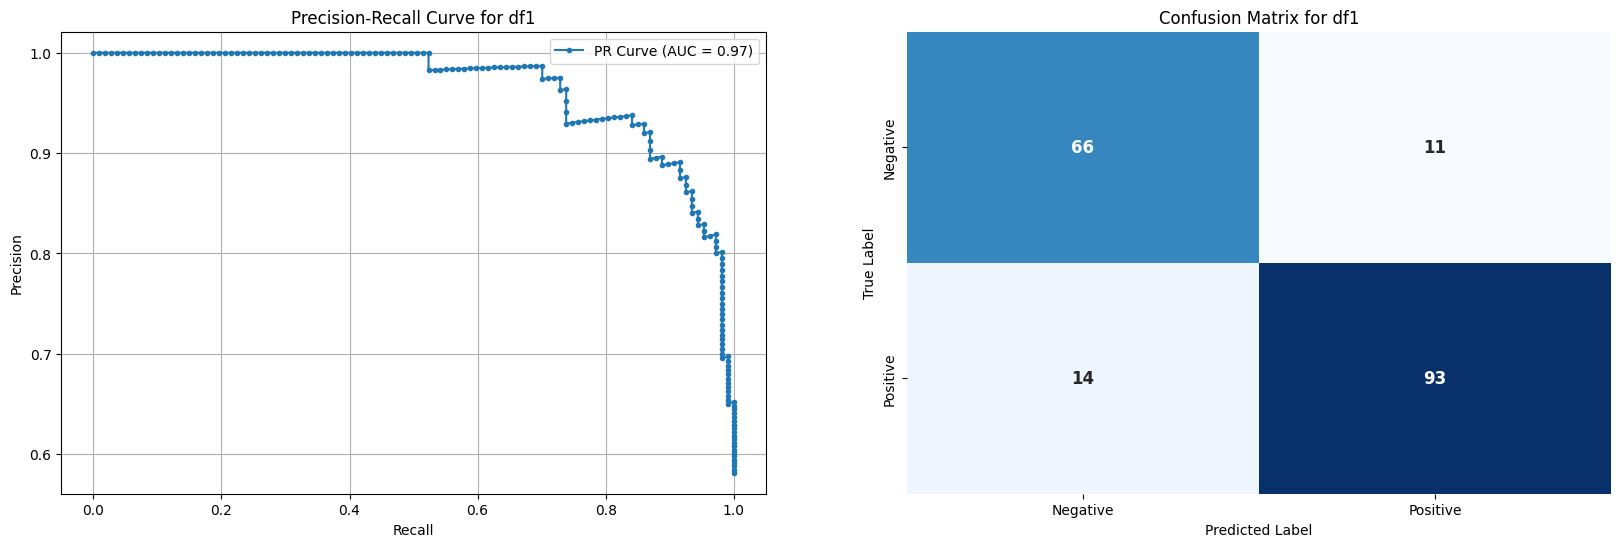

Best parameters found for df2: {'kernel': 'linear'}
Classification Report for df2: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

PR AUC: 0.9422482742599481
Accuracy for df2: 0.86


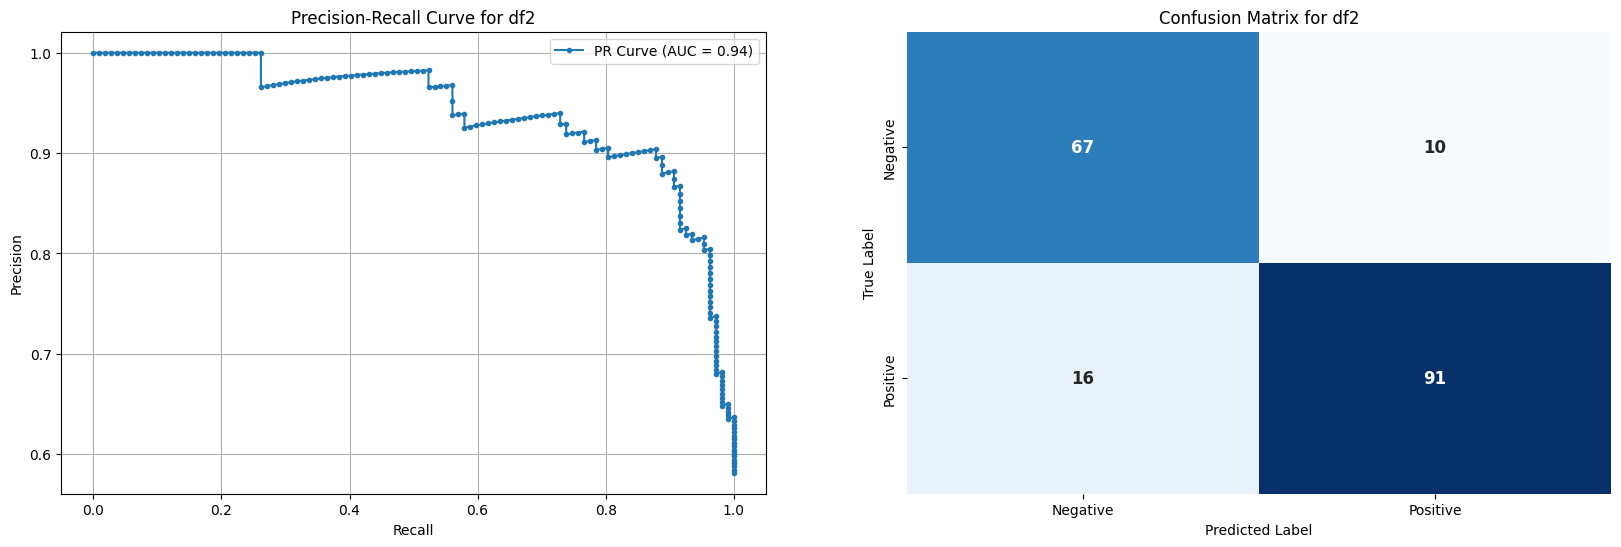

Best parameters found for df3: {'kernel': 'rbf'}
Classification Report for df3: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        77
           1       0.89      0.91      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

PR AUC: 0.9570463650041283
Accuracy for df3: 0.88


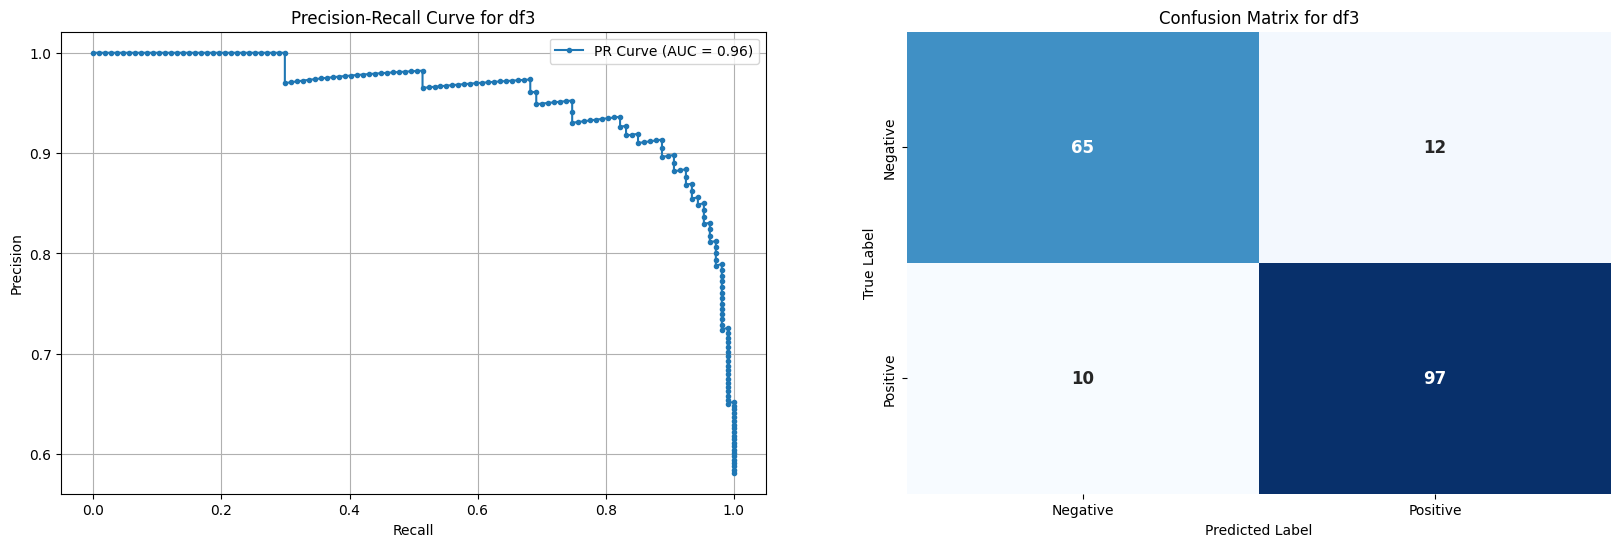

Best parameters found for df1_1: {'kernel': 'rbf'}
Classification Report for df1_1: 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

PR AUC: 0.9650677026807553
Accuracy for df1_1: 0.87


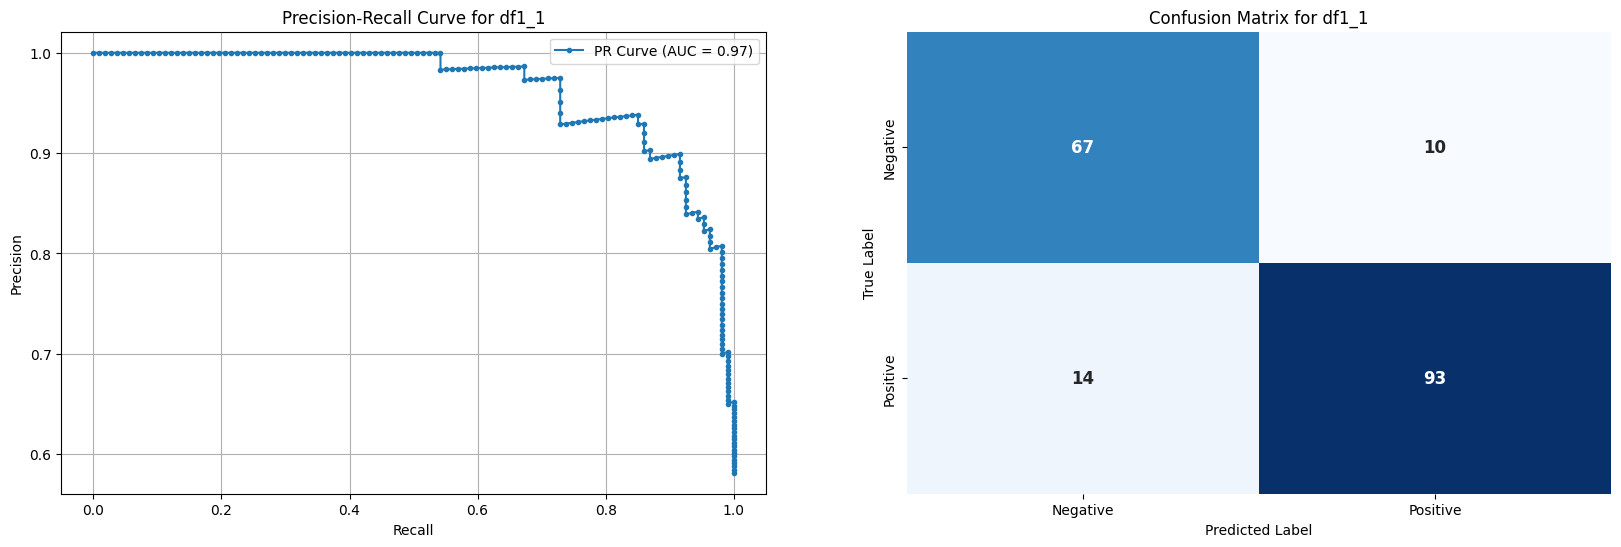

Best parameters found for df2_1: {'kernel': 'rbf'}
Classification Report for df2_1: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

PR AUC: 0.9467185052226619
Accuracy for df2_1: 0.89


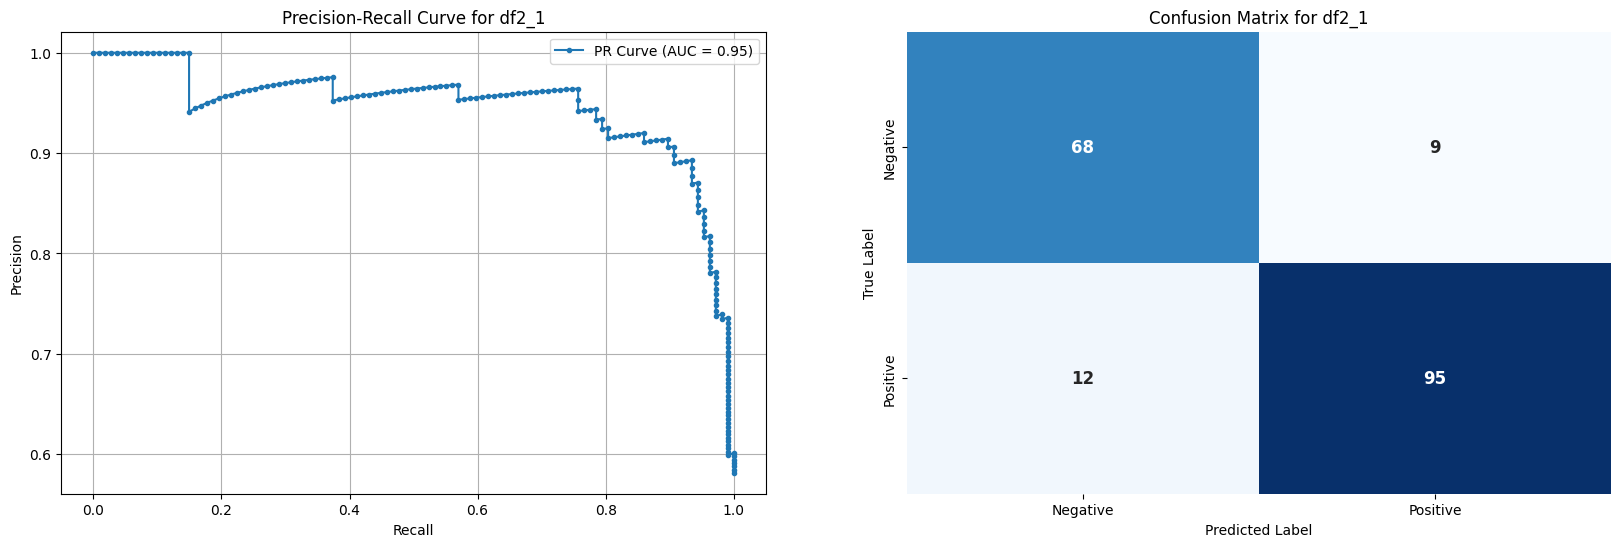

Best parameters found for df3_1: {'kernel': 'rbf'}
Classification Report for df3_1: 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

PR AUC: 0.9547079202052795
Accuracy for df3_1: 0.89


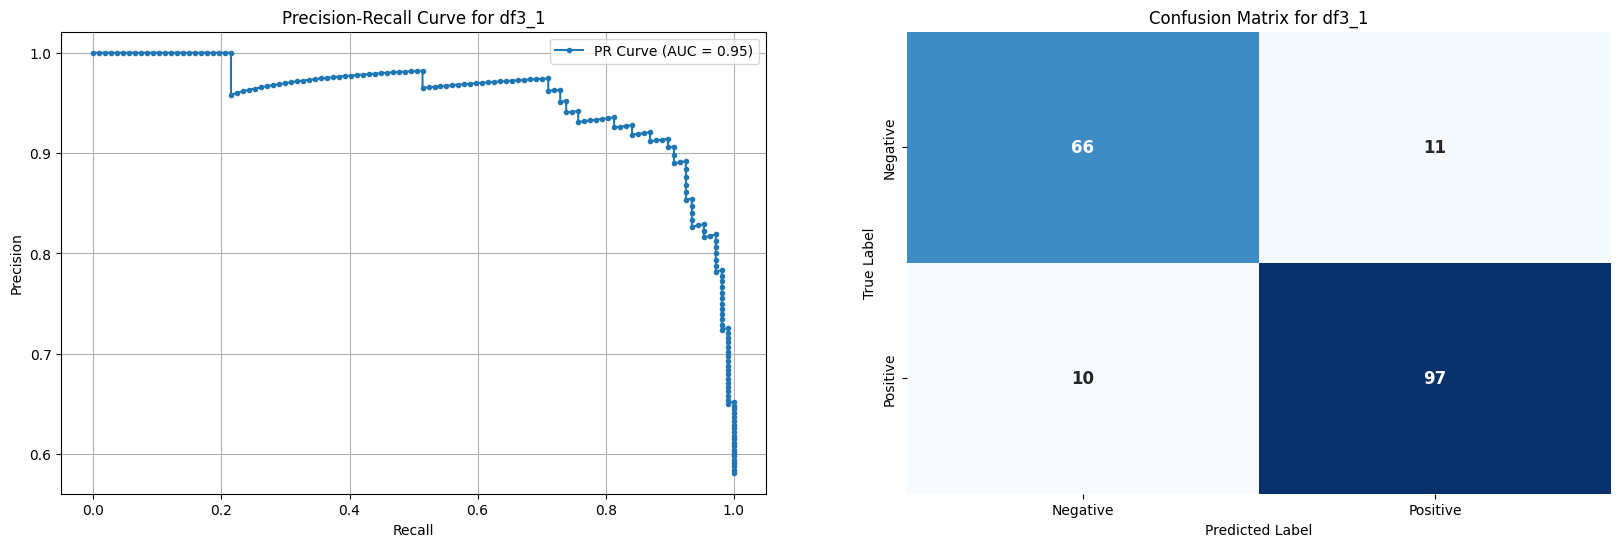

Best parameters found for df1_2: {'kernel': 'rbf'}
Classification Report for df1_2: 
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

PR AUC: 0.9404783036518418
Accuracy for df1_2: 0.84


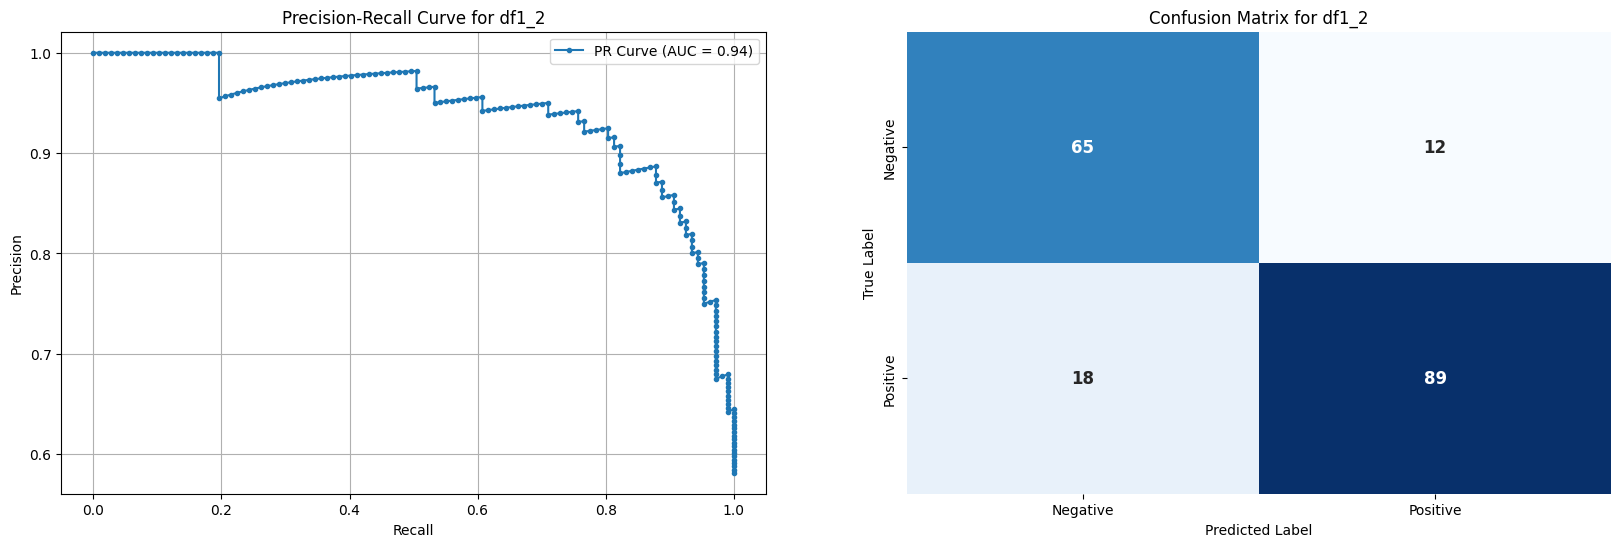

Best parameters found for df2_2: {'kernel': 'rbf'}
Classification Report for df2_2: 
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

PR AUC: 0.9461151091095277
Accuracy for df2_2: 0.86


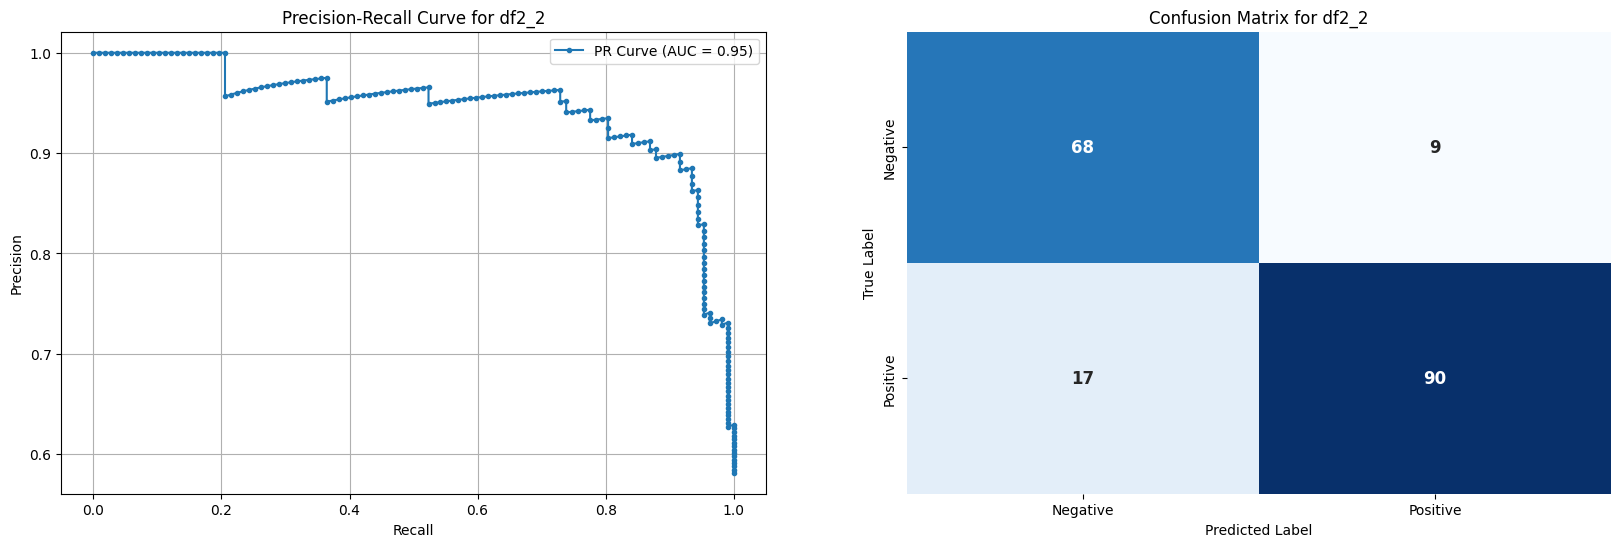

Best parameters found for df3_2: {'kernel': 'rbf'}
Classification Report for df3_2: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

PR AUC: 0.9419439781385648
Accuracy for df3_2: 0.86


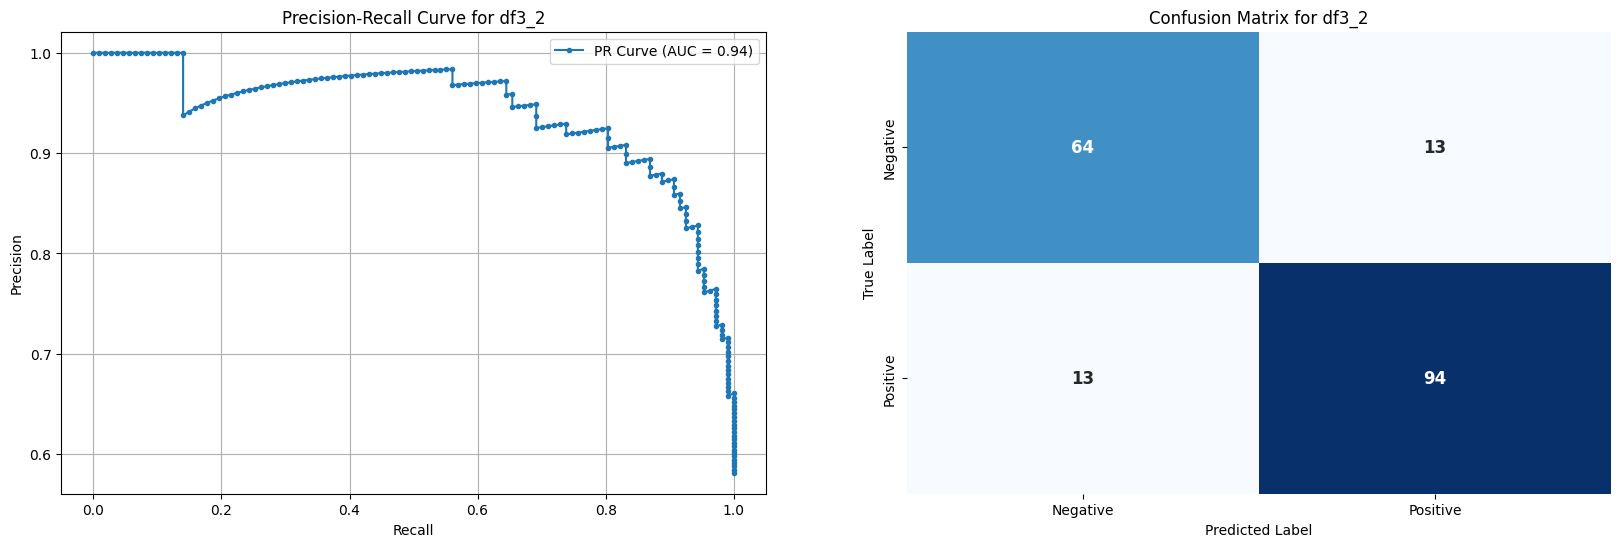

In [61]:

def evaluate_svm(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler and scale the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVM classifier
    svm_clf = SVC(C = 1.0, probability=True)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }

    # Perform Grid Search to find the best parameters
    grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters found by Grid Search
    best_params = grid_search.best_params_
    print(f'Best parameters found for {dataset_label}: {best_params}')

    # Use best parameters to train SVM
    best_svm_clf = SVC(**best_params, probability=True)
    best_svm_clf.fit(X_train_scaled, y_train)

    # Fit the classifier on the scaled training data
    best_svm_clf.fit(X_train_scaled, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = best_svm_clf.predict_proba(X_test_scaled)[:, 1]
    y_pred = best_svm_clf.predict(X_test_scaled)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20,6))

    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()
    
# Dataset labels and data
datasets = {
    'df1': (df1, 'HeartDisease'),
    'df2': (df2, 'HeartDisease'),
    'df3': (df3, 'HeartDisease'),
    'df1_1': (df1_1, 'HeartDisease'),
    'df2_1': (df2_1, 'HeartDisease'),
    'df3_1': (df3_1, 'HeartDisease'),
    'df1_2': (df1_2, 'HeartDisease'),
    'df2_2': (df2_2, 'HeartDisease'),
    'df3_2': (df3_2, 'HeartDisease')
}

# Iterate through each dataset, perform svm classification with scaling, plot PR curve,  and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_svm(X, y, label)
